# Neccesary modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

# Get the data

In [2]:
background = np.load("data/background_rf_LH_normalized.npy")
drone = np.load("data/drone_rf_LH_normalized.npy")

In [3]:
print(background.shape)
print(drone.shape)

(41, 2, 10000000, 1)
(39, 2, 10000000, 1)


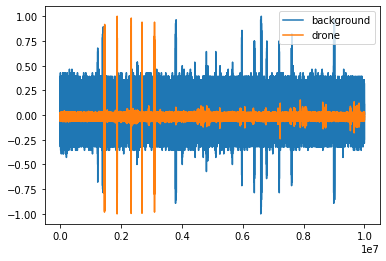

In [4]:
num = random.randint(0, len(background)-1)
channel = 1
plt.plot(background[num][channel], label="background")
plt.plot(drone[num][channel],label="drone")
plt.legend(loc='upper right')

# Train/ test split and data formatting

In [5]:
Y = np.array([0 for i in enumerate(background)] + [1 for i in enumerate(drone)])
X = np.append(background,drone,axis=0)
Y = Y.reshape(-1,1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
def join_rf(x_data):
    low_high = []
    for x in x_data:
        low_high.append(x.flatten().astype(np.float16))
    low_high = np.array(low_high)
    return low_high
x_train = join_rf(x_train)
x_test = join_rf(x_test)

In [ ]:
# num = 11
# plt.plot(x_train[num])
# print(y_train[num])
x_train.shape

# Model Specification

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,
from tensorflow.keras.layers import Input


model = Sequential()
model.add(Dense(100,activation='relu', input_shape=(20000000,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
batch_size =1
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 56 samples, validate on 24 samples


ResourceExhaustedError: OOM when allocating tensor with shape[25599936,100] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node dense_6/kernel/Initializer/random_uniform/RandomUniform (defined at C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Original stack trace for 'dense_6/kernel/Initializer/random_uniform/RandomUniform':
  File "C:\Users\nihad\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nihad\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nihad\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\nihad\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\nihad\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\nihad\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\nihad\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nihad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\nihad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-f4476b116f34>", line 12, in <module>
    model.add(Dense(100, activation='relu'))
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\engine\sequential.py", line 195, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\engine\base_layer.py", line 824, in __call__
    self._maybe_build(inputs)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\engine\base_layer.py", line 2146, in _maybe_build
    self.build(input_shapes)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\layers\core.py", line 1021, in build
    trainable=True)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\engine\base_layer.py", line 529, in add_weight
    aggregation=aggregation)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\training\tracking\base.py", line 712, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\engine\base_layer_utils.py", line 139, in make_variable
    shape=variable_shape if variable_shape else None)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2503, in default_variable_creator
    shape=shape)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\resource_variable_ops.py", line 1406, in __init__
    distribute_strategy=distribute_strategy)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\resource_variable_ops.py", line 1537, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\engine\base_layer_utils.py", line 119, in <lambda>
    init_val = lambda: initializer(shape, dtype=dtype)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\init_ops.py", line 533, in __call__
    shape, -limit, limit, dtype, seed=self.seed)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\random_ops.py", line 245, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\gen_random_ops.py", line 822, in random_uniform
    name=name)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Users\nihad\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()
